### Import neccessary libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import seaborn as sns

### Install required libraries

### Load the database

In [5]:
file_path = "diabetes_without_zero_SkinThickness.csv"  # Use no zero SkinThickness to train model
df = pd.read_csv(file_path)

### Separate features & target variable

In [7]:
X = df.drop(columns=['SkinThickness'])
y = df['SkinThickness']

### Split the dataset (80/20)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression

### Make prediction

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### View result

In [14]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 58.22816860985115
R2 Score: 0.4357913237645835


# 2. Decision Tree Regressor

### Make prediction

In [17]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### View result

In [19]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 112.96261682242991
R2 Score: -0.094564538488491


# 3. Random Forest Regressor

### Make prediction

In [22]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### View result

In [24]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 56.77085514018692
R2 Score: 0.4499121337300921


# 4. Gradient Boosting Regressor

### Make prediction

In [27]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

### View result

In [29]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 59.47166202223816
R2 Score: 0.4237423483483854


# 5. K-Nearest Neighbors (KNN) Regressor

### Make prediction

In [32]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

### View result

In [34]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 99.20635514018693
R2 Score: 0.03872837418561981


# 6. Support Vector Regressor (SVR)

### Make prediction

In [37]:
model = SVR()
model.fit(X_train, y_train)

SVR()

### View result

In [39]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 98.8280621515055
R2 Score: 0.042393888514315026


# Overall Comparison

In [41]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR()
}

In [42]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2', ascending=False)
results_df.reset_index(drop=True, inplace=True)

               Model         MSE       RMSE       MAE        R2
0      Random Forest   56.770855   7.534644  6.068879  0.449912
1  Linear Regression   58.228169   7.630738  6.058049  0.435791
2  Gradient Boosting   59.471662   7.711787  6.052195  0.423742
3                SVR   98.828062   9.941230  7.936732  0.042394
4                KNN   99.206355   9.960239  7.710280  0.038728
5      Decision Tree  112.962617  10.628387  8.738318 -0.094565


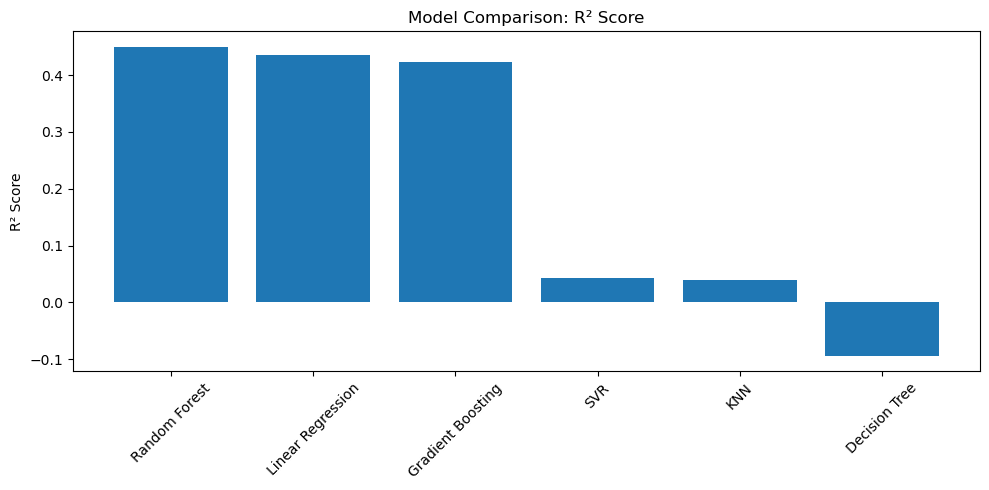

In [43]:
print(results_df)

# Optional: plot R2 scores
plt.figure(figsize=(10, 5))
plt.bar(results_df['Model'], results_df['R2'])
plt.ylabel('R² Score')
plt.title('Model Comparison: R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Predicting SkinThickness to replace initial zero

### Load the database

In [66]:
# Load data
df = pd.read_csv('diabetes_no_zeros.csv')

# Make a copy to preserve the original data
df_full = df.copy()

### Split dataset

In [69]:
# Step 1: Split data into rows with SkinThickness != 0 (train) and == 0 (to predict)
df_train = df[df['SkinThickness'] != 0]
df_predict = df[df['SkinThickness'] == 0]

In [71]:
# Step 2: Prepare features and target for training
X_train = df_train.drop(columns=['SkinThickness'])
y_train = df_train['SkinThickness']

### Make Prediction

In [74]:
# Step 3: Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict SkinThickness for rows where it was 0
X_to_predict = df_predict.drop(columns=['SkinThickness'])
predicted_skinthickness = model.predict(X_to_predict)

### Store in another file

In [77]:
# Step 5: Replace 0s in the original copy with predicted values
df_full.loc[df_full['SkinThickness'] == 0, 'SkinThickness'] = predicted_skinthickness

# Step 6: Save to new CSV
df_full.to_csv('diabetes_predicted_SkinThickness.csv', index=False)

print("✅ Finished! Saved as diabetes_predicted_SkinThickness.csv")

✅ Finished! Saved as diabetes_predicted_SkinThickness.csv


/var/folders/th/cyvc4_fx5gq10ls3wxq6cc3c0000gn/T/ipykernel_65398/3465072020.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[19.65 25.37 39.47 35.62 25.23 29.08 30.41 35.37 36.7  32.72 19.07 35.8
 39.2  27.6  26.67 40.87 35.99 24.03 36.66 38.33 38.02 26.61 40.24 16.24
 18.07 40.48 24.   15.84 43.36 16.15 32.3  29.9  35.05 33.93 25.71 36.3
 23.84 34.   26.24 18.32 27.94 47.3  17.15 38.73 28.26 23.28 28.04 29.29
 28.01 37.42 38.73 17.73 24.9  26.9  17.58 30.32 20.19 38.71 36.35 34.33
 28.72 34.65 37.   31.29 33.97 17.53 20.26 27.17 28.36 25.03 24.78 20.89
 17.32 38.44 24.11 36.06 27.6  22.13 17.72 19.05 42.43 19.47 21.04 19.53
 33.21 19.01 28.54 35.56 36.95 30.53 37.48 25.04 37.65 27.52 27.29 49.36
 29.01 39.51 37.09 33.42 16.89 26.93 23.25 34.12 23.21 17.56 24.7  17.16
 23.98 30.87 36.27 22.81 23.68 24.7  16.05 21.89 30.96 23.34 26.65 24.57
 23.93 35.08 23.51 22.81 17.93 36.26 39.71 32.04 27.08 20.2  

### Visualizing the data

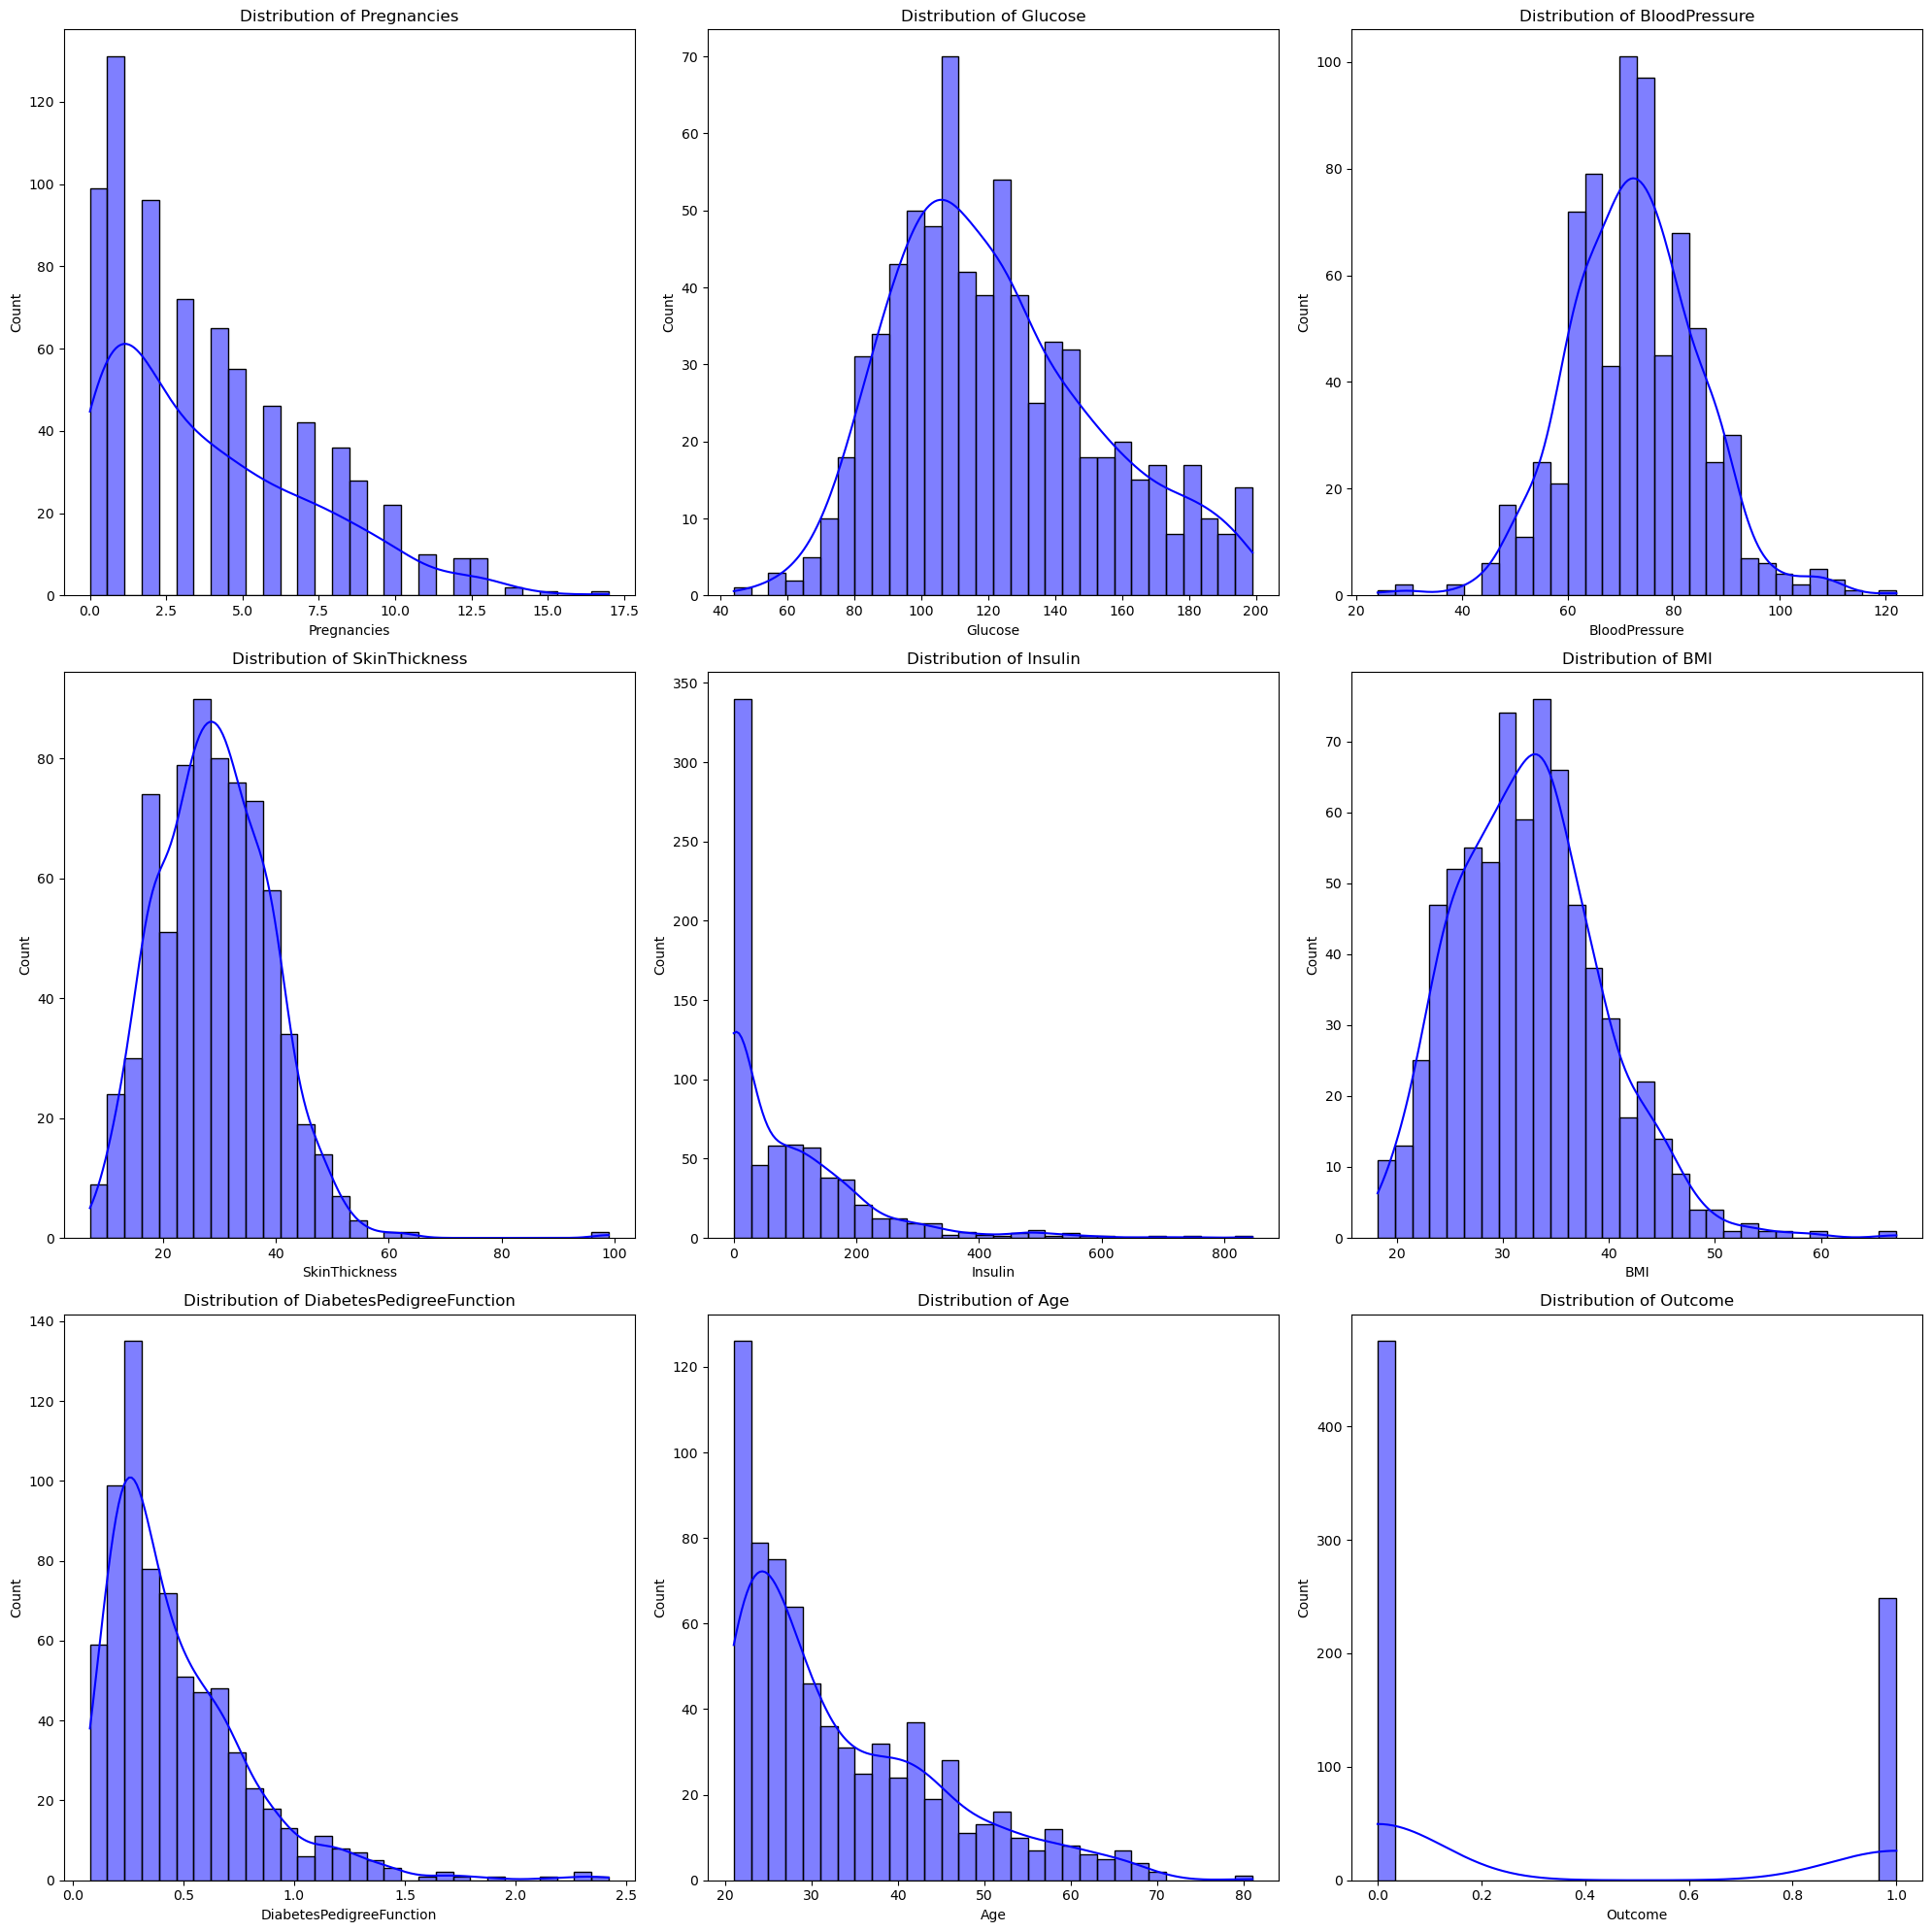

In [84]:
data_columns = df_full.columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(data_columns):  
    plt.subplot(3, 3, i+1)
    sns.histplot(df_full[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()